# Using Axes3D and Sklearn.decomposition

In [35]:
from mpl_toolkits.mplot3d import Axes3D as ax
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import pandas as pd
%matplotlib inline

In [36]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
pca = PCA(n_components=3)

In [38]:
x = iris_data.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].values
y = iris_data.loc[:,'species'].values

In [39]:
principalComponents = pca.fit_transform(x)
finaldf = pd.DataFrame(principalComponents,columns=['Plot1','Plot2','Plot3'])

In [40]:
finaldf['species'] = iris_data['species']

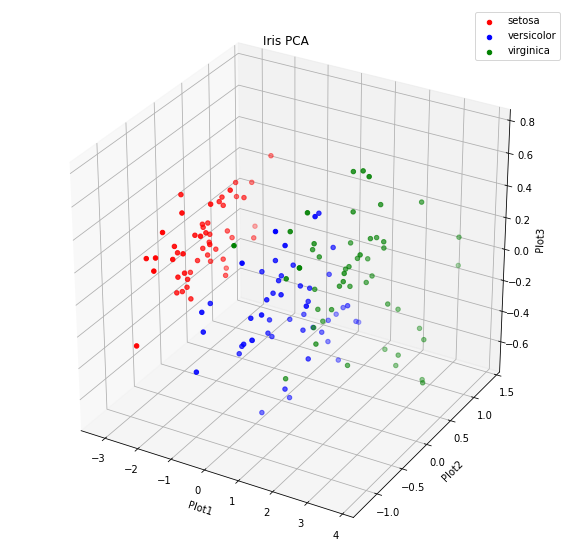

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Plot1')
ax.set_ylabel('Plot2')
ax.set_zlabel('Plot3')
ax.set_title('Iris PCA')
targets = list(finaldf['species'].unique())
colors = ['r','b','g']
for target,colors in zip(targets,colors):
    selected = (finaldf['species'] == target)
    ax.scatter(finaldf.loc[selected, 'Plot1'],
               finaldf.loc[selected, 'Plot2'],
               finaldf.loc[selected, 'Plot3']
               ,c = colors)
ax.legend(targets)
ax.grid()
plt.show()

# Using Plotly

In [42]:
import plotly.express as ply
import cufflinks as cff
import numpy as np
cff.go_offline()
ply.scatter_3d(x=finaldf['Plot1'],y=finaldf['Plot2'],z=finaldf['Plot3'],color=finaldf['species'])